# DIAMONS DATASET

The aim of this project is to build an app so that the user who has a diamond at home can enter its characteristics and predict its price.

The model that will generate the price of the user's diamond will be trained and stored in the model folder.

The dataset contains the following characteristics:
- **price** price in US dollars (\$326--\$18,823)
- **carat** weight of the diamond (0.2--5.01)
- **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color** diamond colour, from J (worst) to D (best)
- **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x** length in mm (0--10.74)
- **y** width in mm (0--58.9)
- **z** depth in mm (0--31.8)
- **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table** width of top of diamond relative to widest point (43--95)

In [1]:
# Import the necessary dependencies for the data exploration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the data
data = pd.read_csv("../data/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Delete the first column
data = data.drop("Unnamed: 0", axis=1)

In [4]:
# See if there are duplicates
data.duplicated().sum()

146

In [5]:
# Delete the duplicates
data = data.drop_duplicates()

In [6]:
# See the statistics of the table
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


depth   -0.011048
table    0.126566
z        0.861208
y        0.865395
x        0.884504
carat    0.921548
price    1.000000
Name: price, dtype: float64


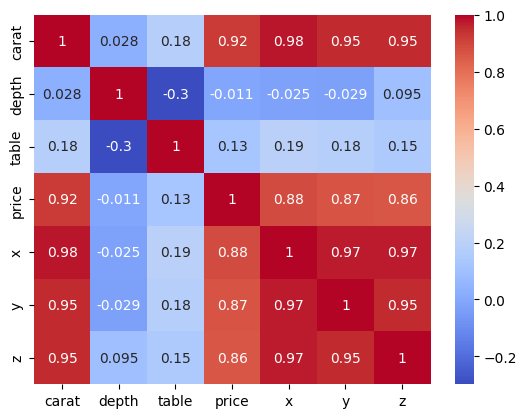

In [7]:
# Visualize the correlations
dropFeatures = ["cut","color","clarity"]
dataNumeric = data.drop(dropFeatures, axis=1)
corr = dataNumeric.corr()
sns.heatmap(corr, annot = True, cmap="coolwarm")
print(dataNumeric.corr()["price"].sort_values())

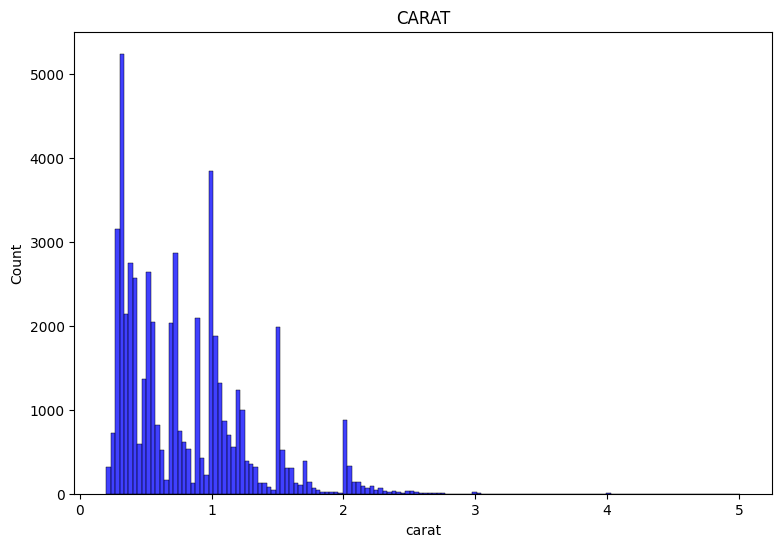

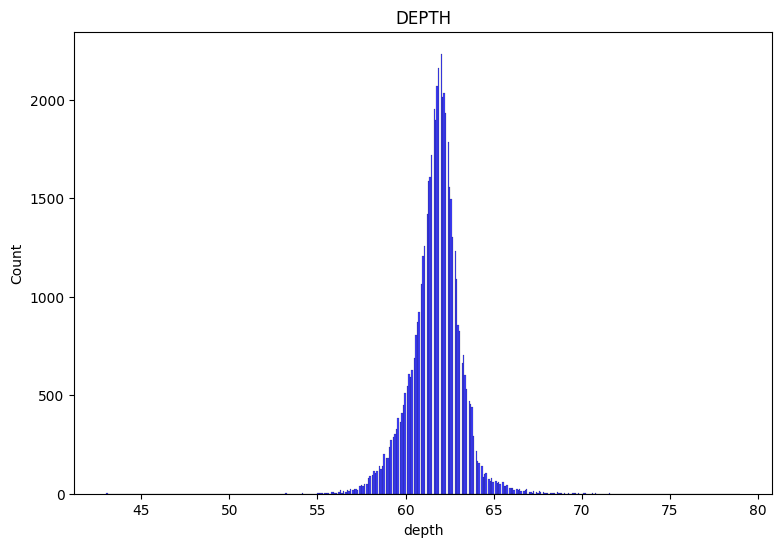

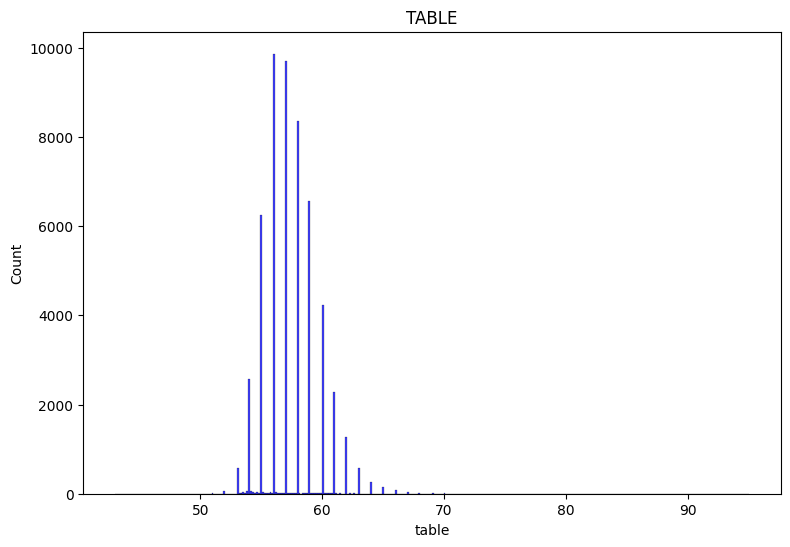

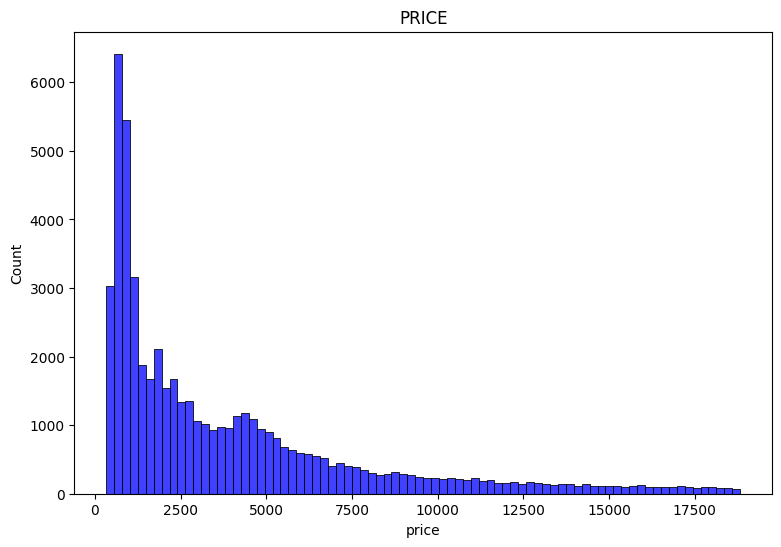

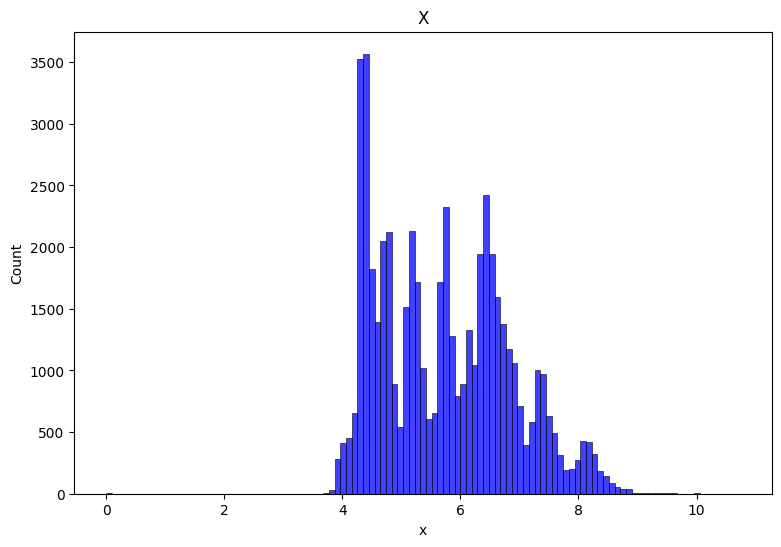

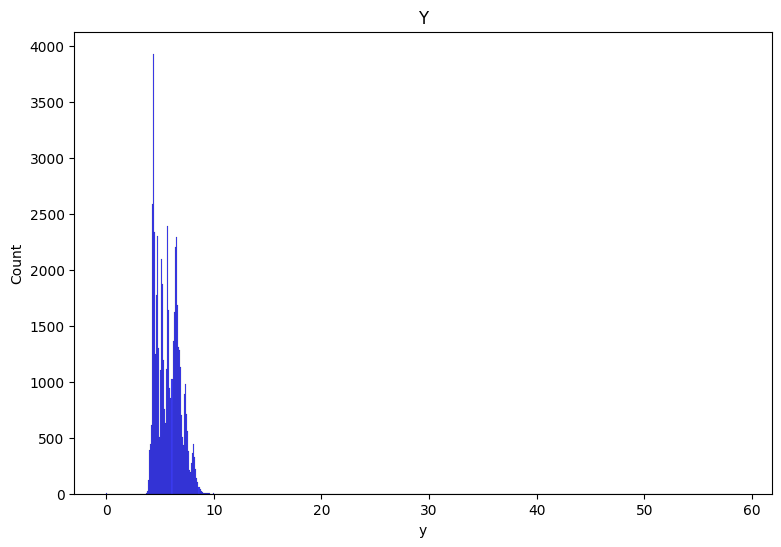

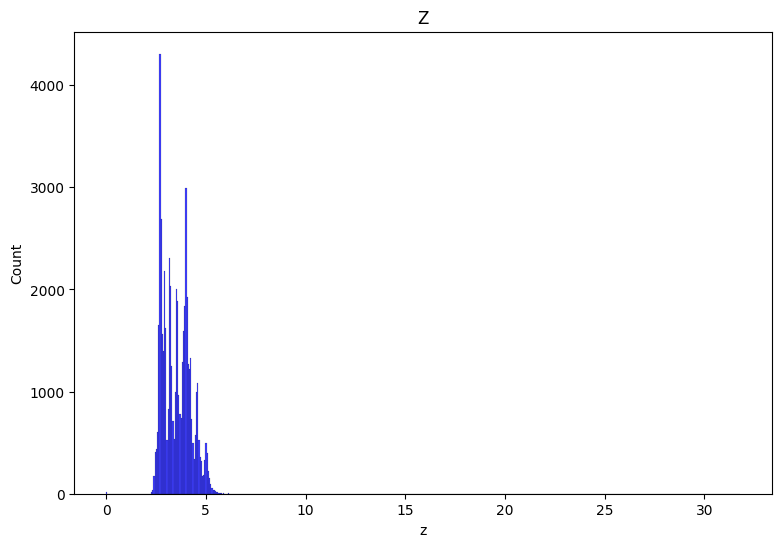

In [8]:
# Visualize the distribution of each feature
feature = 0
while (feature <= 9):
    if feature == 1 or feature == 2 or feature == 3:
        feature += 1
        continue
    else:
        plt.figure(figsize=(9,6))
        sns.histplot(data=data, x=data.iloc[:,feature], color="blue")
        plt.title(f"{data.columns[feature].upper()}")
        plt.show()
        feature += 1

At this point we must transform the values that are not numerical, because to be able to pass the data through a model it must have all the numerical features, otherwise the model will not be able to work.

For this purpose we will map all columns with non-numeric values.

In [9]:
cut_quality = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_quality = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7}
clarity_quality = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

data['cut'] = data['cut'].map(cut_quality)
data['color'] = data['color'].map(color_quality)
data['clarity'] = data['clarity'].map(clarity_quality)

prep_data = data[["carat", "x", "y", "z", 'cut', 
                  'clarity', 'color', "depth", 
                  "table", "price"]]
prep_data

,carat,x,y,z,cut,clarity,color,depth,table,price
0,0.23,3.95,3.98,2.43,5,2,2,61.5,55.0,326
1,0.21,3.89,3.84,2.31,4,3,2,59.8,61.0,326
2,0.23,4.05,4.07,2.31,2,5,2,56.9,65.0,327
3,0.29,4.20,4.23,2.63,4,4,6,62.4,58.0,334
4,0.31,4.34,4.35,2.75,2,2,7,63.3,58.0,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,5,3,1,60.8,57.0,2757
53936,0.72,5.69,5.75,3.61,2,3,1,63.1,55.0,2757
53937,0.70,5.66,5.68,3.56,3,3,1,62.8,60.0,2757
53938,0.86,6.15,6.12,3.74,4,2,5,61.0,58.0,2757


In [10]:

# Import all the models that we want to try

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.metrics import r2_score

import pickle


In [11]:
# Select the variables

x = prep_data.drop("price", axis=1).values
y = prep_data["price"].values
print(x,y)

[[ 0.23  3.95  3.98 ...  2.   61.5  55.  ]
 [ 0.21  3.89  3.84 ...  2.   59.8  61.  ]
 [ 0.23  4.05  4.07 ...  2.   56.9  65.  ]
 ...
 [ 0.7   5.66  5.68 ...  1.   62.8  60.  ]
 [ 0.86  6.15  6.12 ...  5.   61.   58.  ]
 [ 0.75  5.83  5.87 ...  1.   62.2  55.  ]] [ 326  326  327 ... 2757 2757 2757]


In [12]:
# Make the split to get all the data to train and test the models
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)

In [13]:
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (36041, 9)
x_test shape: (17753, 9)
y_train shape: (36041,)
y_test shape: (17753,)


### Test all the models

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
regLR = LinearRegression()
regLR.fit(x_train,y_train)
predictionLR = regLR.predict(x_test)

In [16]:
regPoly = PolynomialFeatures(degree = 2)
xPoly = regPoly.fit_transform(x_train)
regLR.fit(xPoly,y_train)
predictionPoly = regLR.predict(regPoly.fit_transform(x_test))

In [17]:
regSVR = SVR(kernel = "linear")
regSVR.fit(x_train, y_train)
predictionSVR = regSVR.predict(x_test)

In [18]:
regDT = DecisionTreeRegressor(random_state=0)
regDT.fit(x_train,y_train)
predictionDT = regDT.predict(x_test)

In [19]:
regRF = RandomForestRegressor(n_estimators=1000, random_state=0)
regRF.fit(x_train,y_train)
predictionRF = regRF.predict(x_test)

## Evaluate all the modules

In [20]:
listForModels = ["Linear Regression", "Polynomial Regression", "Support Vector Regression", "Decision Tree", "Random Forest"]
listForPredictions = [predictionLR, predictionPoly, predictionSVR, predictionDT, predictionRF]

def comparisonModels(listForModels,listForPredictions,y_test):
    
    for modelName, predictions in zip(listForModels, listForPredictions):
        
        mae = round(mean_absolute_error(y_test,predictions), 1)
        r2 = round(r2_score(y_test,predictions), 2)
        mape = round(mean_absolute_percentage_error(y_test,predictions)*100, 1)
        
        
        print(f"Model Name: {modelName}")
        print(f"Mean Absoulute Error: {mae}")
        print(f"R-Score: {r2}")
        print(f"Mean Absoulute Percentage Error: {mape}%")
        print("\n")

comparisonModels(listForModels,listForPredictions,y_test)

Model Name: Linear Regression
Mean Absoulute Error: 809.4
R-Score: 0.91
Mean Absoulute Percentage Error: 43.6%


Model Name: Polynomial Regression
Mean Absoulute Error: 476.9
R-Score: 0.81
Mean Absoulute Percentage Error: 19.8%


Model Name: Support Vector Regression
Mean Absoulute Error: 834.2
R-Score: 0.86
Mean Absoulute Percentage Error: 31.0%


Model Name: Decision Tree
Mean Absoulute Error: 360.6
R-Score: 0.97
Mean Absoulute Percentage Error: 8.6%


Model Name: Random Forest
Mean Absoulute Error: 267.9
R-Score: 0.98
Mean Absoulute Percentage Error: 6.4%




# CONCLUSION

The conclusion obtained by the notebook is that the best model is the Random Forest model, since the mean error is the lowest, the r_score is the highest and the percentage error is the lowest of all, so we can generate a fairly reliable prediction with this model. 

In [24]:
regRF = RandomForestRegressor(n_estimators=1000, random_state=0)
winner_model = regRF.fit(x, y)
predictionRF = regRF.predict(x_test)

In [25]:
with open('RF_model.pkl', 'wb') as archivo:
    pickle.dump(winner_model, archivo)